In [25]:
import sys
import pathlib
src_path = pathlib.Path().absolute().parent /"src"
sys.path.append(str(src_path))
import data_functions
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import matplotlib as plt
import seaborn as sns
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
x_train, x_test, y_train = data_functions.get_dataframes()

In [4]:
x_train.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], inplace=True, axis=1)

x_test.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], inplace=True, axis=1)

In [5]:
x_train.head()

,amount_tsh,gps_height,basin,region,lga,population,construction_year,extraction_type_group,payment_type,water_quality,quality_group,quantity,quantity_group,source_type,waterpoint_type
id,,,,,,,,,,,,,,,
69572,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1999,gravity,annually,soft,good,enough,enough,spring,communal standpipe
8776,0.0,1399,Lake Victoria,Mara,Serengeti,280,2010,gravity,never pay,soft,good,insufficient,insufficient,rainwater harvesting,communal standpipe
34310,25.0,686,Pangani,Manyara,Simanjiro,250,2009,gravity,per bucket,soft,good,enough,enough,dam,communal standpipe multiple
67743,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1986,submersible,never pay,soft,good,dry,dry,borehole,communal standpipe multiple
19728,0.0,0,Lake Victoria,Kagera,Karagwe,0,0,gravity,never pay,soft,good,seasonal,seasonal,rainwater harvesting,communal standpipe


In [6]:
x_train_nums= x_train.select_dtypes(exclude="object")
x_train_cat= x_train.select_dtypes(include="object")

In [7]:
ohe=OneHotEncoder(drop='first', sparse=False)

In [8]:
x_train_ohe=pd.DataFrame(ohe.fit_transform(x_train_cat), columns= ohe.get_feature_names(x_train_cat.columns), index= x_train_cat.index)
sum(x_train_ohe.isna().sum())

0

In [9]:
x_train_ohe.shape

(59400, 202)

In [10]:
si=SimpleImputer()
x_nums_si=pd.DataFrame(si.fit_transform(x_train_nums), index= x_train_nums.index, columns= x_train_nums.columns)

In [11]:
scale= StandardScaler()
x_train_nums_scaled= pd.DataFrame(scale.fit_transform(x_nums_si), index= x_nums_si.index, columns= x_nums_si.columns)

In [12]:
x_final= x_train_nums_scaled.join(x_train_ohe)

In [13]:
x_final.head()

,amount_tsh,gps_height,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,...,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,1.895665,1.041252,-0.150399,0.733857,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8776,-0.105970,1.054237,0.212290,0.745416,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34310,-0.097630,0.025541,0.148660,0.744365,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67743,-0.105970,-0.584751,-0.258570,0.720196,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19728,-0.105970,-0.964200,-0.381587,-1.366788,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
x_val, x_val_test, y_val, y_val_test= train_test_split(x_final, y_train, random_state=2020)

In [15]:
bin_y = lambda x: 1 if x == 'functional' else 0
y_tr_final = y_val['status_group'].apply(bin_y)
y_te_final = y_val_test['status_group'].apply(bin_y)

In [15]:
# from imblearn.over_sampling import SMOTE
# sm1 = SMOTE(random_state=2020)

In [25]:
# X_tr_sm, y_tr_sm = sm1.fit_resample(x_val, y_val)

In [16]:
y_tr_final.shape

(44550,)

In [ ]:
# rf=RandomForestClassifier()
# rf.fit(X_tr_sm,y_tr_sm)
# y_pred_rf_1=rf.predict(x_val_test)

In [21]:
lr_1= LogisticRegression(max_iter= 2000)
lr_1.fit(x_val,y_tr_final)
y_pred_lr_1=lr_1.predict(x_val_test)
print(classification_report(y_te_final, y_pred_lr_1))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71      6840
           1       0.74      0.85      0.79      8010

    accuracy                           0.76     14850
   macro avg       0.77      0.75      0.75     14850
weighted avg       0.76      0.76      0.76     14850



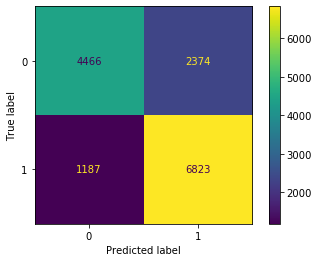

In [26]:
plot_confusion_matrix(lr_1, x_val_test,y_te_final)

In [22]:
lr_2= LogisticRegression(max_iter= 2000, class_weight= 'balanced')
lr_2.fit(x_val,y_tr_final)
y_pred_lr_2=lr_2.predict(x_val_test)
print(classification_report(y_te_final, y_pred_lr_2))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      6840
           1       0.75      0.81      0.78      8010

    accuracy                           0.75     14850
   macro avg       0.75      0.75      0.75     14850
weighted avg       0.75      0.75      0.75     14850



In [27]:
lr_3= LogisticRegression(max_iter= 1500, C=10)
lr_3.fit(x_val,y_tr_final)
y_pred_lr_3=lr_3.predict(x_val_test)
print(classification_report(y_te_final, y_pred_lr_3))

              precision    recall  f1-score   support

           0       0.79      0.65      0.72      6840
           1       0.74      0.85      0.79      8010

    accuracy                           0.76     14850
   macro avg       0.77      0.75      0.75     14850
weighted avg       0.76      0.76      0.76     14850



In [21]:
lr_3= LogisticRegression(max_iter= 1500, C=10)
lr_3.fit(x_val,y_tr_final)
y_pred_lr_3=lr_3.predict(x_val_test)
print(classification_report(y_te_final, y_pred_lr_3))

In [32]:
lr = LogisticRegression()

In [33]:
params = { 'C' : [.2, .5, 1, 3, 10, 15], 
          'max_iter': [1500, 2000]}


In [34]:
lr_1_grid_search=GridSearchCV(lr,params,cv=3, return_train_score= True) #feel free to remove return_train_score


In [35]:
lr_1_grid_search.fit(x_val, y_tr_final)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.2, 0.5, 1, 3, 10, 15],
                         'max_iter': [1500, 2000]},
             return_train_score=True)